# Integrated CA

Questions:
1) Discuss and explain the purpose of a recommendation system for online retail business in machine learning. Briefly compare Content and Collaborative filtering using any dataset of your choice (Datasets used in the class tutorials or exercises are not allowed to use in this CA2). Train and test machine learning models for the user-user and item-item collaborative filtering. Justify your recommendations for the considered scenario by providing a conceptual insight.
(60 marks)

2) Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can you express major similarities/ divergence between these models? Compare and contrast the machine learning results obtained based on both algorithms.
(40 marks)

3) Create an interactive Dashboard aimed at younger adults (18 - 35 years) with specific features to summarise the most important aspects of the data and identify through your visualisation why this dataset is suitable for Machine Learning models in an online retail business. Explain how your dashboard is designed with this demographic in mind.
(70 marks) 

4) Discuss in detail your rationale and justification for all stages of data preparation for your visualizations.
(30 marks)

https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

# Libraries

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.experimental import enable_iterative_imputer

from sklearn import impute

from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

from scipy import stats

from scipy.stats import mannwhitneyu

sns.set()

In [2]:
an = pd.read_csv("anime.csv")

In [3]:
r = pd.read_csv("rating.csv")

In [4]:
an.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
an.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
r.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Missing Values

In [8]:
an.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
isnull = an.isnull().sum()

nperc = pd.DataFrame((isnull / (len(an))) * 100)

nperc.columns = ["% of NaN"]

nperc.head(20)

,% of NaN
anime_id,0.000000
name,0.000000
genre,0.504311
type,0.203351
episodes,0.000000
rating,1.870831
members,0.000000


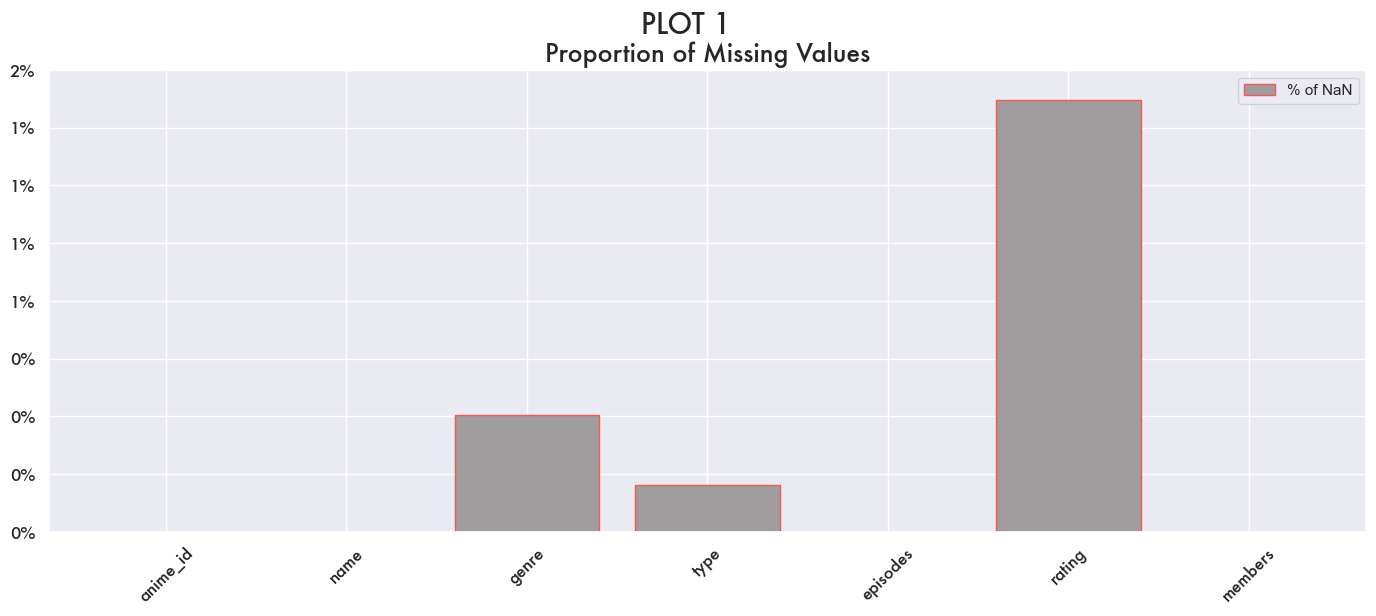

In [10]:
nperc.plot(kind = "bar", color = "#9F9D9E", figsize = (17,6),
          width = 0.8, edgecolor = "#FD5551", 
          linestyle = "-")


plt.suptitle("PLOT 1", font = "Futura", fontsize = 20)
plt.title("Proportion of Missing Values", font = "Futura", fontsize = 18)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]], font = "Futura")
plt.xticks(rotation = 45, font = "Futura");

In [11]:
an = an.replace('Unknown', np.nan)

an["episodes"] = an["episodes"].astype(int)

In [12]:
an.dropna(subset = ["genre", "type", "rating"], inplace = True)

# EDA

In [13]:
an.tail(1)

,anime_id,name,genre,type,episodes,rating,members
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


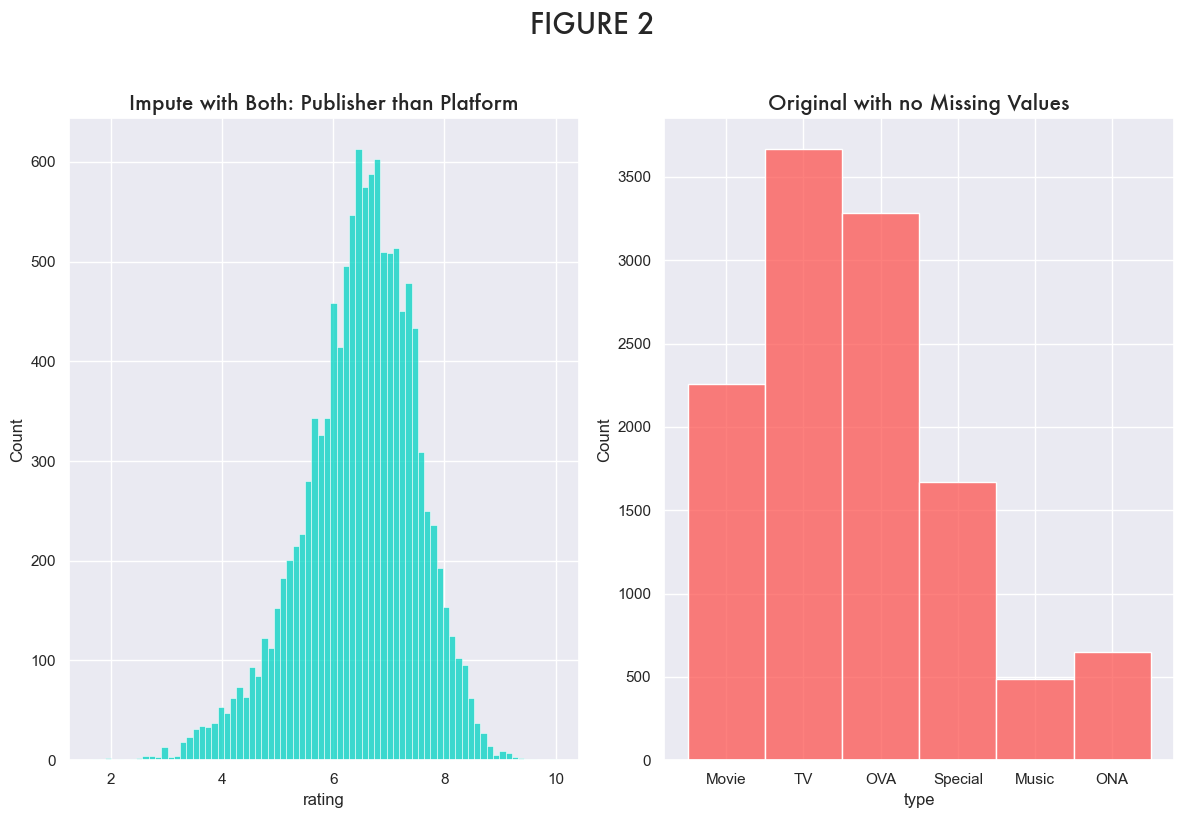

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (12, 8))


sns.histplot(data = an, x = "rating", ax = axes[0], color = "#00D3C2")
axes[0].set_title("Impute with Both: Publisher than Platform", font = "Futura", fontsize = 15)

sns.histplot(data = an, x = "type", ax = axes[1], color = "#FD5551")
axes[1].set_title("Original with no Missing Values", font = "Futura", fontsize = 15)


fig.suptitle("FIGURE 2", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

plt.axvline(anime_data.rating.mean() , label=f'mean_rating({anime_data.rating.mean():1.2f})' , color="blue")

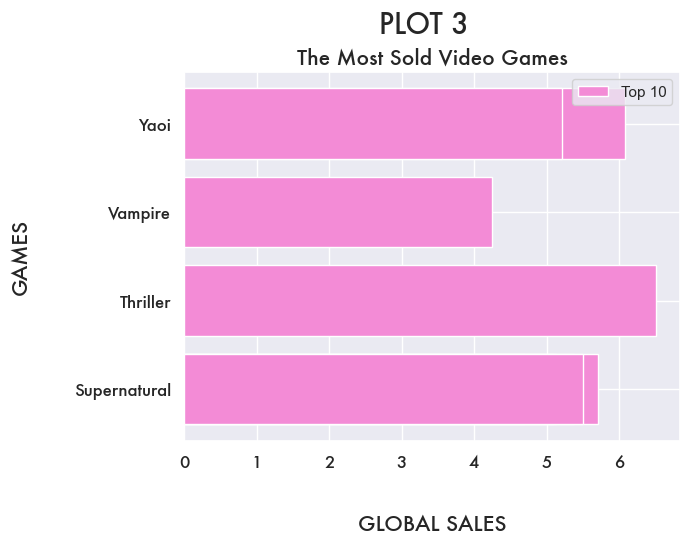

In [15]:
#plt.figure(figsize = (6, 6))

top_10 = an.sort_values(by = "genre", ascending = False).head(10)
#top_5 = an.sort_values(by = "genre", ascending = False).head(5)

plt.barh(top_10["genre"], top_10["rating"], color = "#F38BD6", label = "Top 10")
#plt.barh(top_5["name"], top_5["genre"], color = "#00D3C2", label = "Top 5")

plt.xlabel("GLOBAL SALES", labelpad = 30, fontname = "Futura", fontsize = 15)
plt.xticks(fontname = "Futura", fontsize = 12)
plt.ylabel("GAMES", labelpad = 30, fontname = "Futura", fontsize = 15)
plt.yticks(fontname = "Futura", fontsize = 12)
plt.title("The Most Sold Video Games", fontname = "Futura", y = 1, fontsize = 15)
plt.suptitle("PLOT 3", fontname = "Futura", y = 1.01, fontsize = 20)
plt.legend()



plt.gca().invert_yaxis()
plt.show()

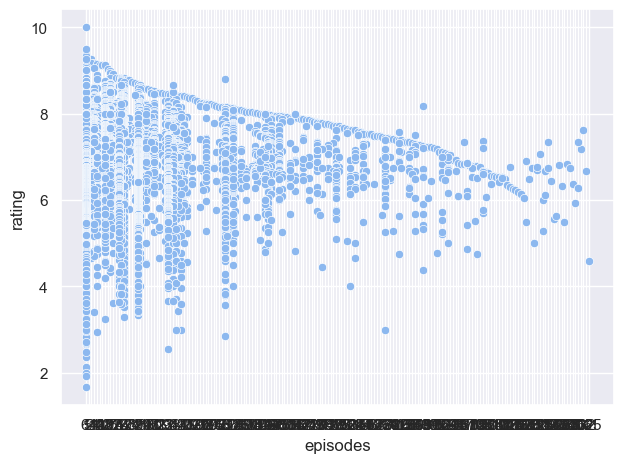

In [16]:
sns.scatterplot(data = an, x = "episodes", y = "rating", color = "#8CB8EF")
               #hue = "Year_of_Release", 


#plt.xticks(fontname = "Futura", fontsize = 12, bins = 20)

fig.suptitle("FIGURE 4", fontname = "Futura", y = 1, fontsize = 20)

plt.tight_layout()
plt.show()

In [17]:
pearson_corr = an[["rating", "episodes"]].corr(method = "pearson")

spearman_corr = an[["rating", "episodes"]].corr(method = "spearman")

print("Pearson correlation coefficient:")
print(pearson_corr)
print("\nSpearman correlation coefficient:")
print(spearman_corr)

Pearson correlation coefficient:
           rating  episodes
rating    1.00000   0.08819
episodes  0.08819   1.00000

Spearman correlation coefficient:
            rating  episodes
rating    1.000000  0.283836
episodes  0.283836  1.000000


plt.figure(figsize=(8, 5))
plt.scatter(data = an, x = "episodes", y = "rating" , linewidth=1, edgecolor='black')

plt.xlabel("Episodes")
plt.ylabel("Population")
plt.title("\n\nEpisode vs Population")
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x900 with 0 Axes>

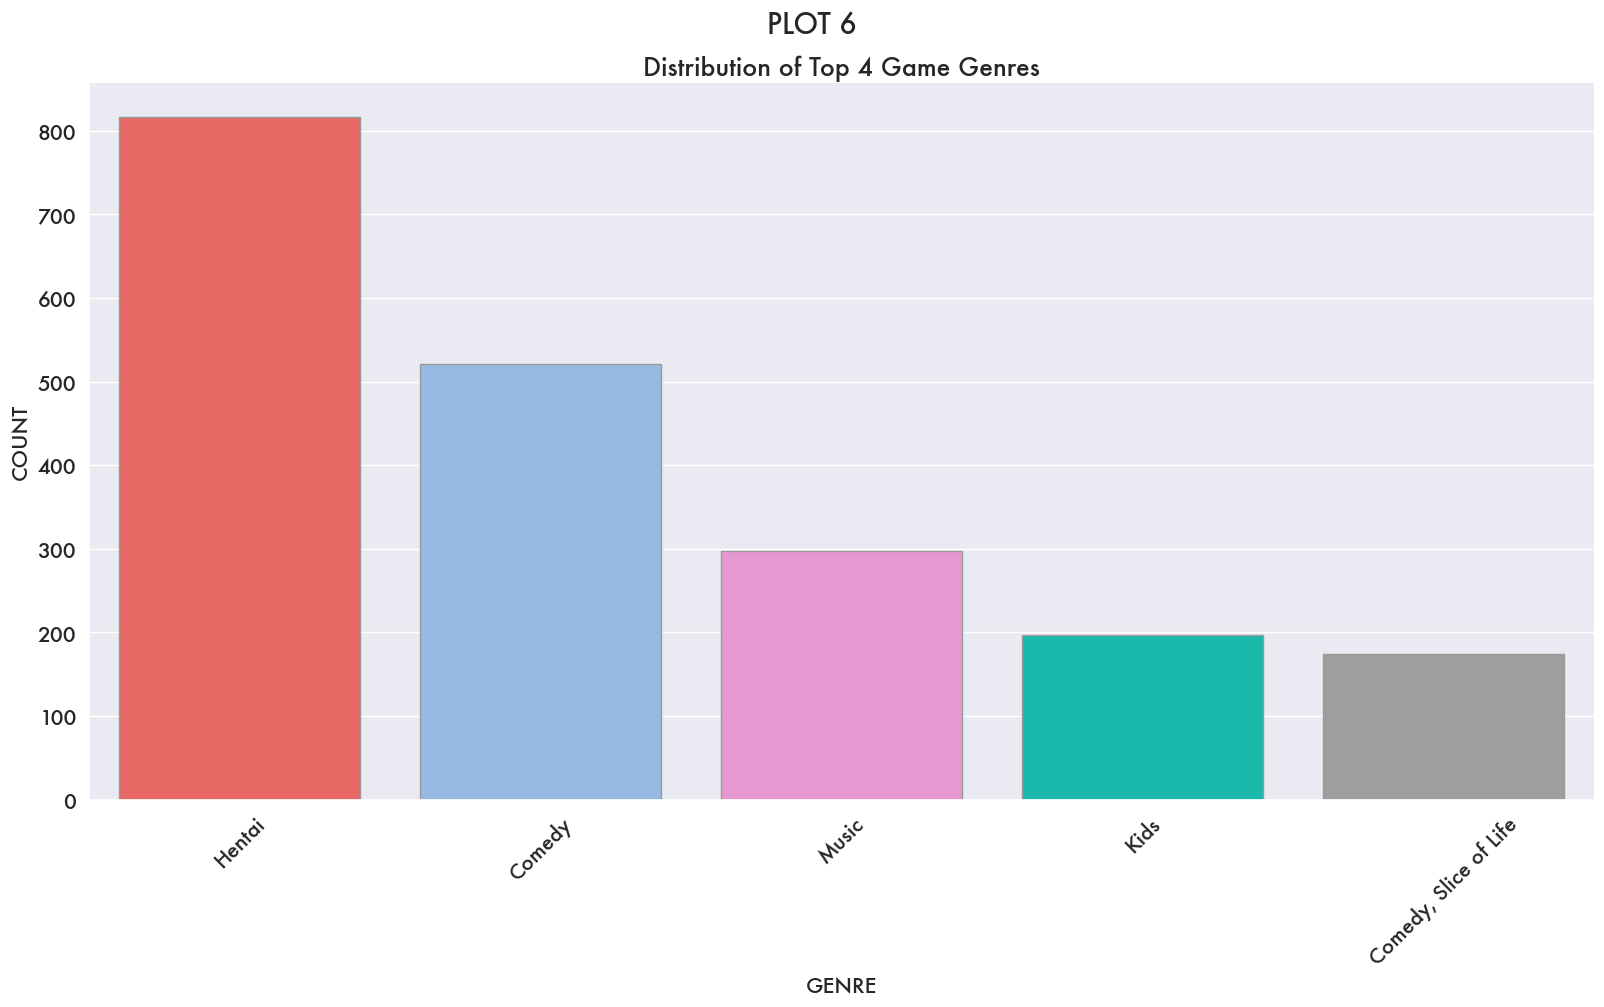

In [18]:
plt.figure(figsize = (18, 9))

sns.catplot(data = an[an["genre"].isin(an["genre"].value_counts().head(5).index)], 
             x = "genre", kind = "count", edgecolor = "0.6", height = 8, aspect = 2,
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"],
           order = an["genre"].value_counts().head(5).index)

plt.suptitle("PLOT 6", font = "Futura", fontsize = 20, y = 1.07)
plt.title("Distribution of Top 4 Game Genres", font = "Futura", fontsize = 18, y = 1)
plt.xlabel("GENRE", font = "Futura", fontsize = 15)
plt.ylabel("COUNT", font = "Futura", fontsize = 15)
plt.xticks(rotation = 45) 


plt.yticks(font = "Futura", fontsize = 15)
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x900 with 0 Axes>

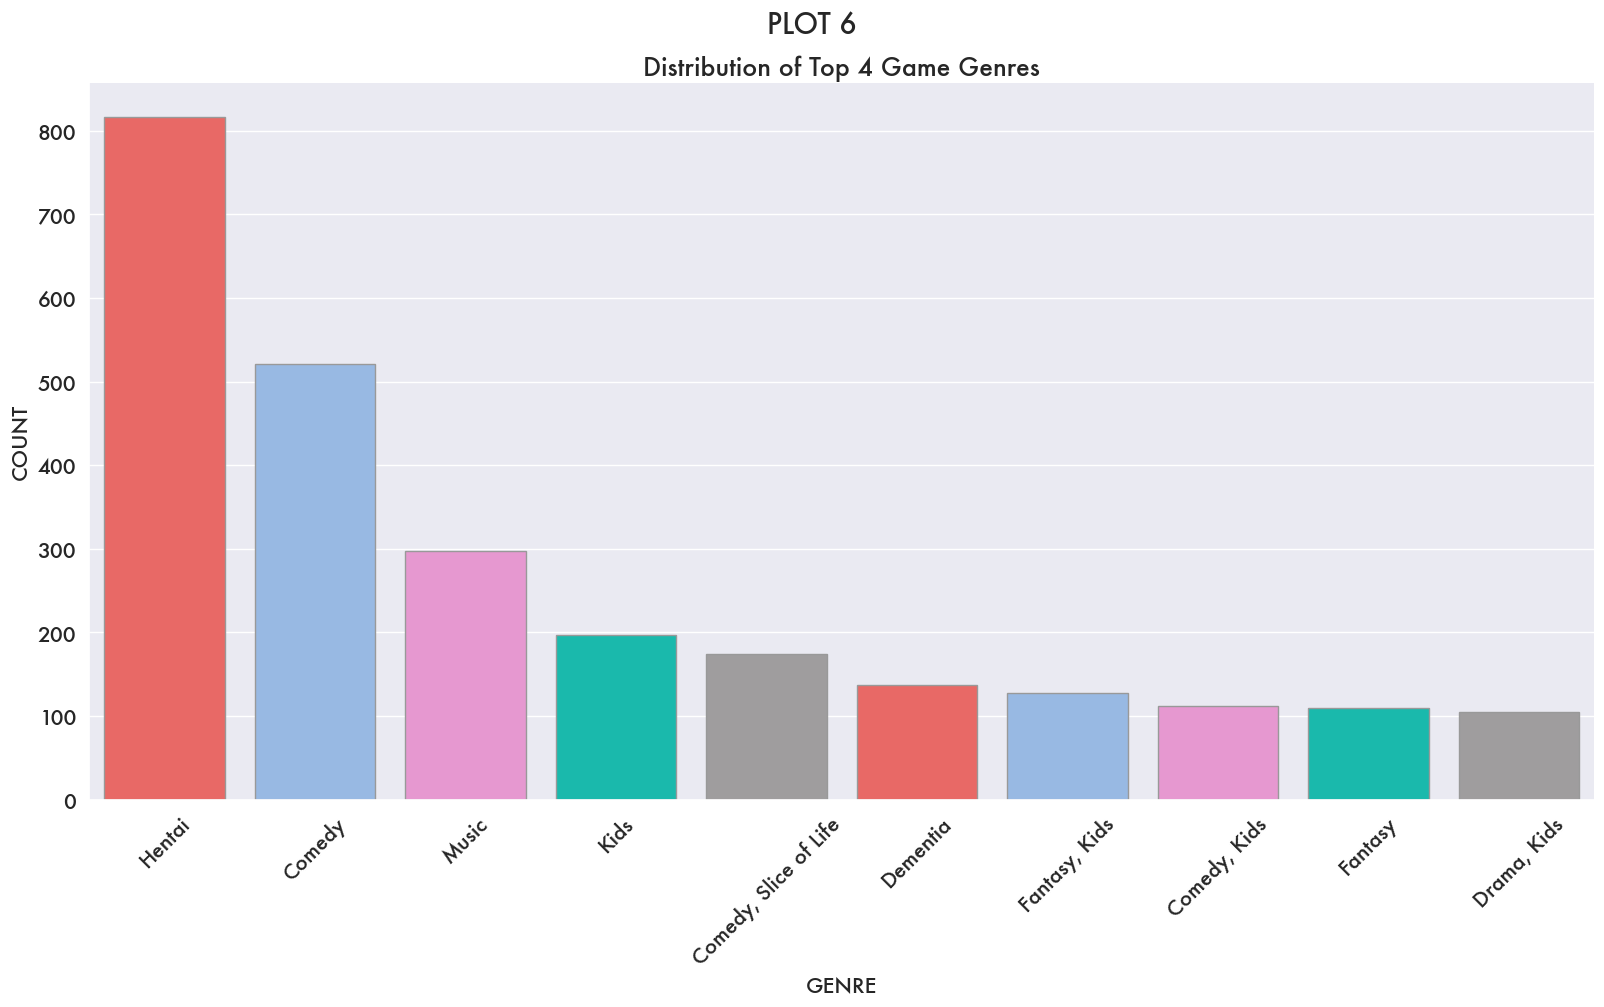

In [19]:
plt.figure(figsize = (18, 9))

sns.catplot(data = an[an["genre"].isin(an["genre"].value_counts().head(10).index)], 
             x = "genre", kind = "count", edgecolor = "0.6", height = 8, aspect = 2,
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"],
           order = an["genre"].value_counts().head(10).index)

plt.suptitle("PLOT 6", font = "Futura", fontsize = 20, y = 1.07)
plt.title("Distribution of Top 4 Game Genres", font = "Futura", fontsize = 18, y = 1)
plt.xlabel("GENRE", font = "Futura", fontsize = 15)
plt.ylabel("COUNT", font = "Futura", fontsize = 15)
plt.xticks(rotation = 45) 


plt.yticks(font = "Futura", fontsize = 15)
plt.xticks(rotation = 45, font = "Futura", fontsize = 15)
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

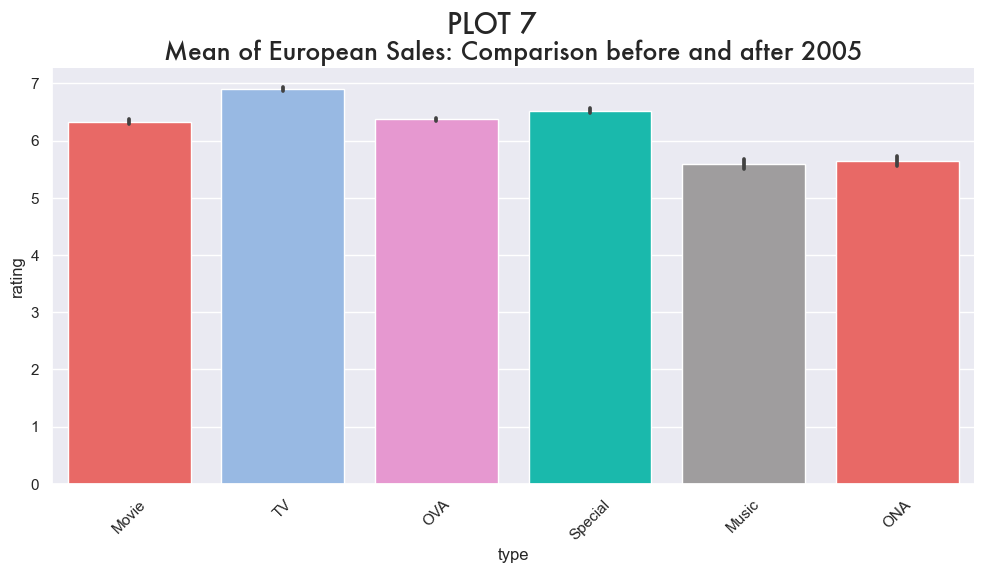

In [20]:
plt.figure(figsize=(20, 10))

sns.catplot(data = an, x = "type", y = "rating", 
            kind = "bar", aspect = 2, errorbar=("ci", 95),
           palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"])

#plt.axvline(x = 25, linewidth = 1, color = "#00D3C2", linestyle = "--")

#plt.axhline(y = 0.22, linewidth = 1, color = "#FD5551", linestyle = "--")
#plt.axhline(y = 0.15, linewidth = 1, color = "#FD5551", linestyle = "--")
#plt.axhline(y = 0.3, linewidth = 1, color = "#FD5551", linestyle = "--")

plt.suptitle("PLOT 7", font = "Futura", fontsize = 20, y = 1.08)
plt.title("Mean of European Sales: Comparison before and after 2005", font = "Futura", fontsize = 18, y = 1)

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

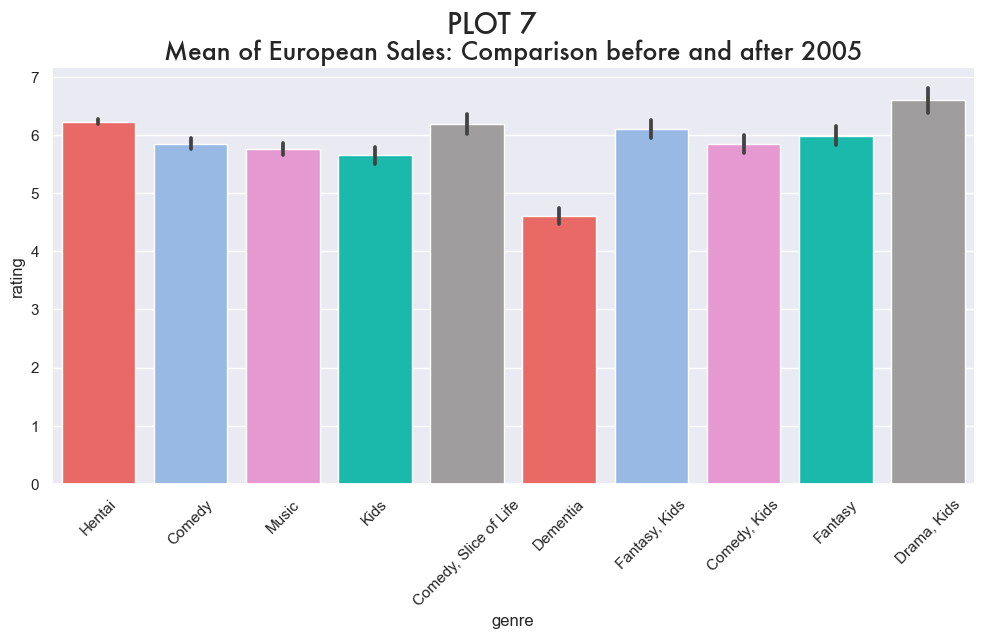

In [21]:
plt.figure(figsize=(20, 10))


sns.catplot(data = an[an["genre"].isin(an["genre"].value_counts().head(10).index)], 
             x = "genre", y = "rating", 
            kind = "bar", aspect = 2, errorbar=("ci", 95),
            palette = ["#FD5551", "#8CB8EF", "#F38BD6", "#00D3C2", "#9F9D9E"],
           order = an["genre"].value_counts().head(10).index)

plt.suptitle("PLOT 7", font = "Futura", fontsize = 20, y = 1.08)
plt.title("Mean of European Sales: Comparison before and after 2005", font = "Futura", fontsize = 18, y = 1)

plt.xticks(rotation = 45)

#plt.tight_layout(pad = 0.1)

plt.show()

### Plots

plots based on this jupyter notebook: 
https://www.kaggle.com/code/maryamborzoo/anime-recommendations

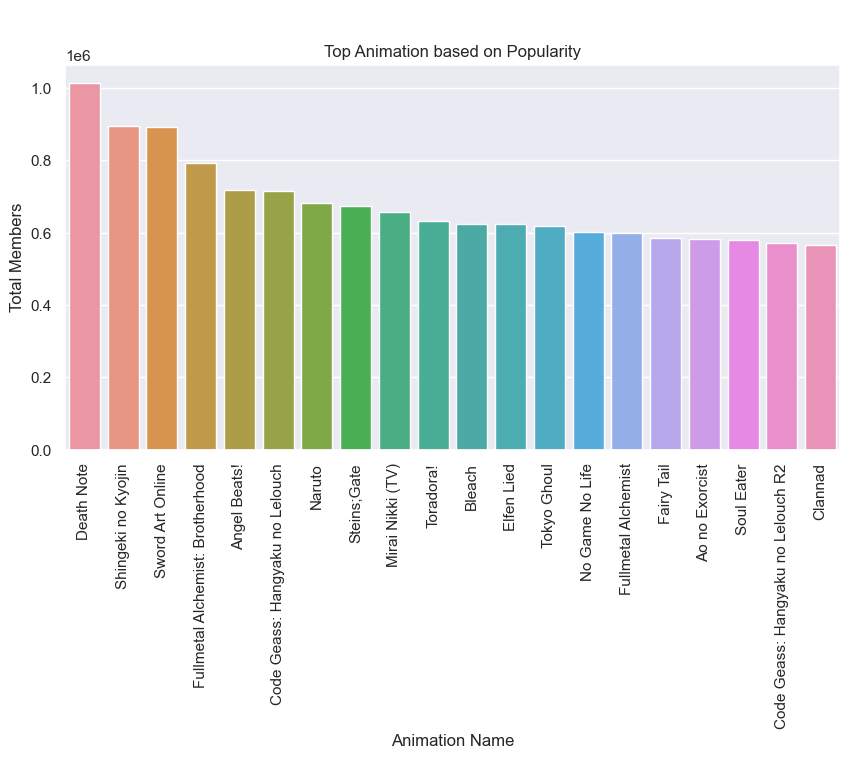

In [22]:
top_anime_members = an.sort_values(by=['members'], ascending=False)[:20]

plt.figure(figsize=(10, 5))

sns.barplot(x=top_anime_members["name"],y=top_anime_members["members"])
plt.xlabel("Animation Name")
plt.ylabel('Total Members')
plt.title("\n\nTop Animation based on Popularity")
plt.xticks(rotation=90)

plt.show()

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1354/2599903718.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_anime_rating = an.sort_values(by=['rating'], ascending=False)[an['members']>50][:20]


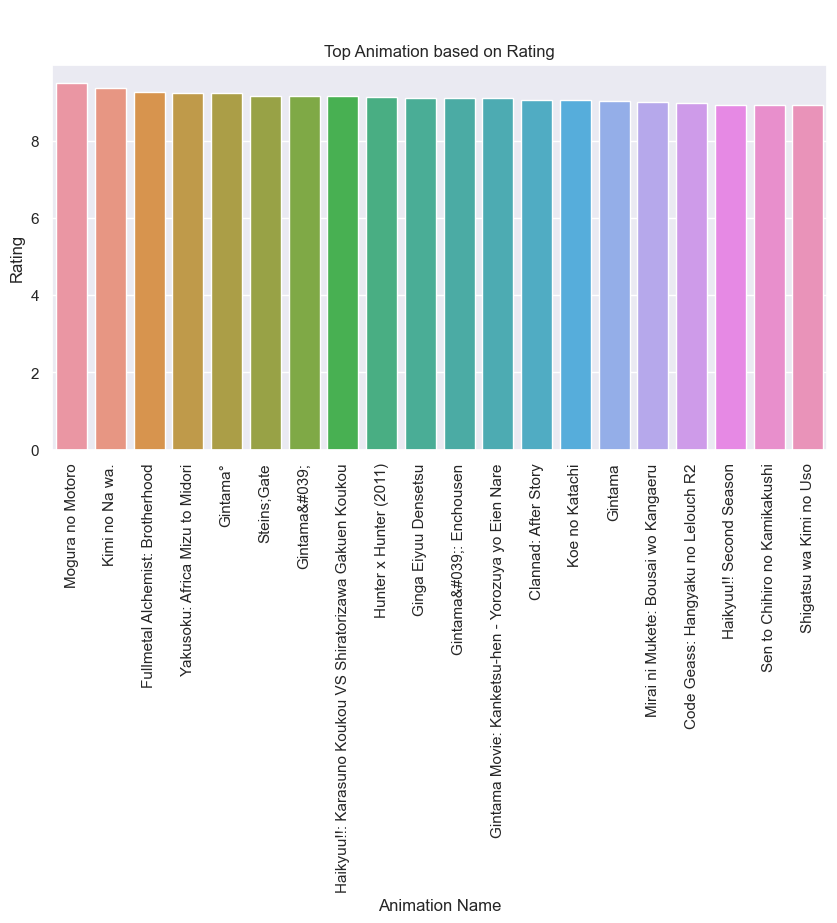

In [23]:
top_anime_rating = an.sort_values(by=['rating'], ascending=False)[an['members']>50][:20]

plt.figure(figsize=(10, 5))

sns.barplot(x=top_anime_rating["name"],y=top_anime_rating["rating"])
plt.xlabel("Animation Name")
plt.ylabel("Rating")
plt.title("\n\nTop Animation based on Rating")
plt.xticks(rotation=90)

plt.show()

Compress Large Range: Anime ratings typically fall between a small range (like 1 to 10). When plotted on a linear scale, even small differences between highly rated anime can appear visually insignificant. Logarithmic scale compresses this range, making it easier to distinguish between ratings, especially for the top-ranked shows.

Highlight Relative Changes: Since logarithms deal with exponents, the scale focuses on proportional changes rather than absolute differences. This can be useful when analyzing ratings because a difference of 0.1 points might be more significant at the higher end (between a 9.8 and a 9.9) compared to the lower end (between a 6.8 and a 6.9).

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

Text(0.5, 1.01, '\n\nRating distribution for each type')

<Figure size 1000x500 with 0 Axes>

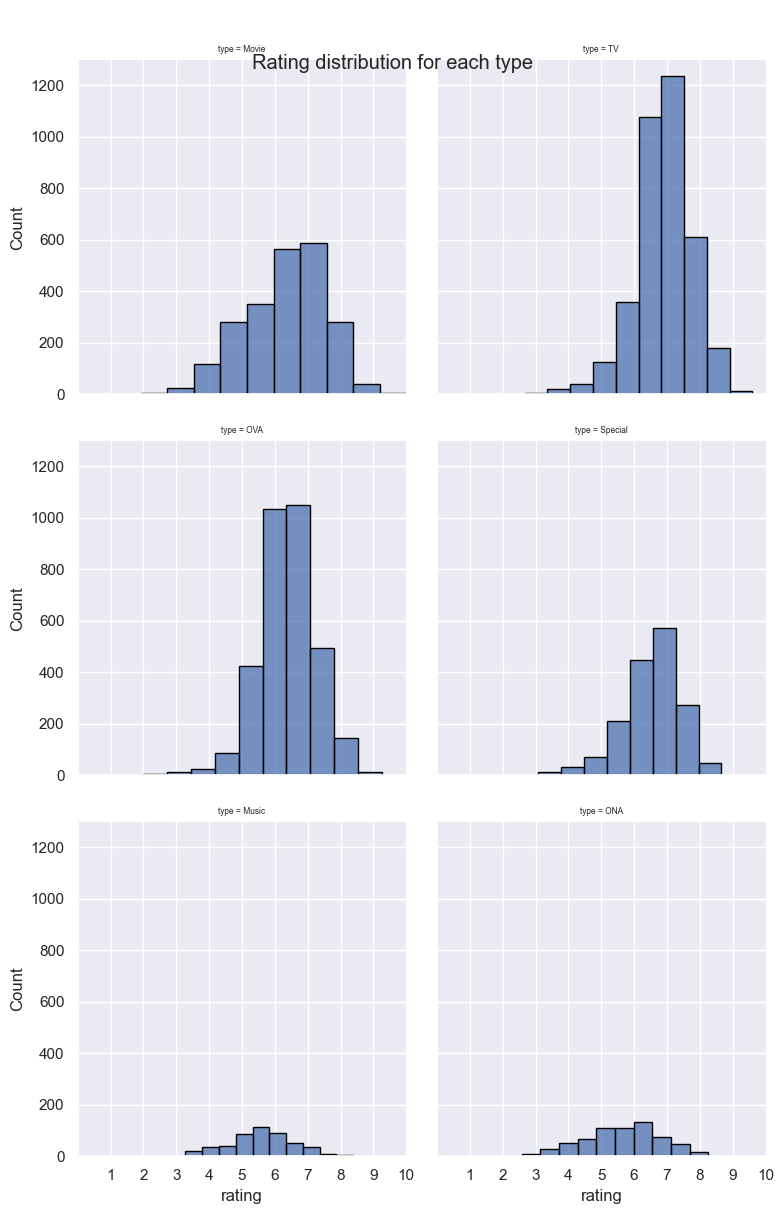

In [24]:
# ratings vary by type
plt.figure(figsize=(10, 5))

g = sns.FacetGrid(an, col="type", col_wrap=2, height=4, xlim=(0, 10))
g.map_dataframe(sns.histplot, "rating" , bins=(10) , edgecolor='black')
g.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
g.set_titles(size=6)
g.fig.suptitle('\n\nRating distribution for each type' , y=1.01 , fontdict={"weight": "bold"})

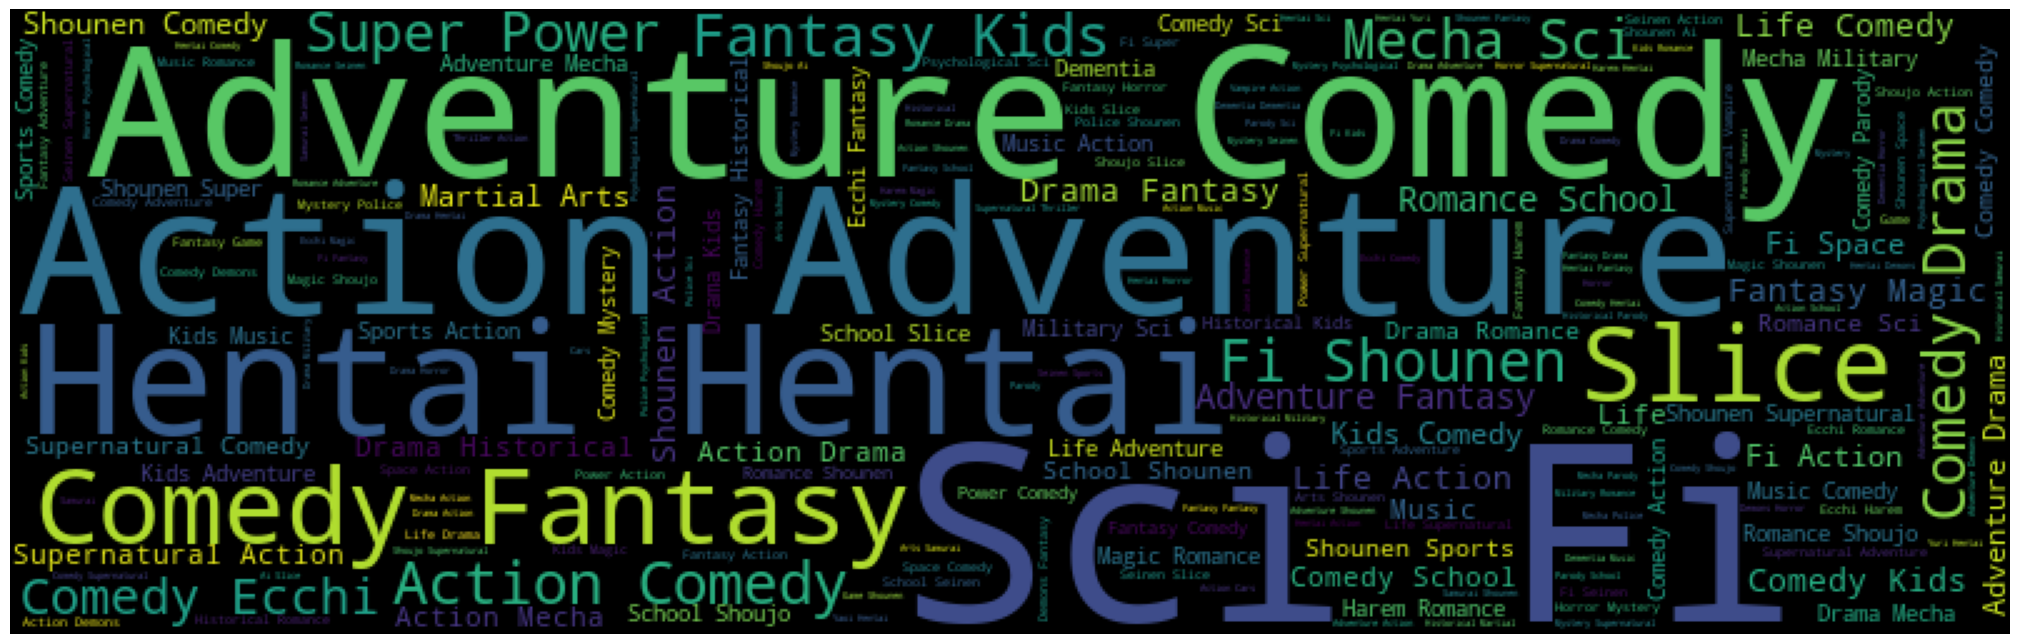

In [25]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250,max_font_size=100).generate(an["genre"].str.cat(sep=", | , | ,"))

plt.figure(figsize = (20, 8)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

## User-Based Recommendation 

https://www.kaggle.com/code/metin23/user-based-recommendation

In [26]:
import scipy as sp 
import plotly.graph_objects as go

In [27]:
an.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [28]:
avgrat_type = [round(an[an["type"] == "TV"]["rating"].mean(),3),
                    round(an[an["type"] == "Movie"]["rating"].mean(),3),
                    round(an[an["type"] == "Special"]["rating"].mean(),3),
                    round(an[an["type"] == "OVA"]["rating"].mean(),3),
                    round(an[an["type"] == "ONA"]["rating"].mean(),3),
                    round(an[an["type"] == "Music"]["rating"].mean(),3)]

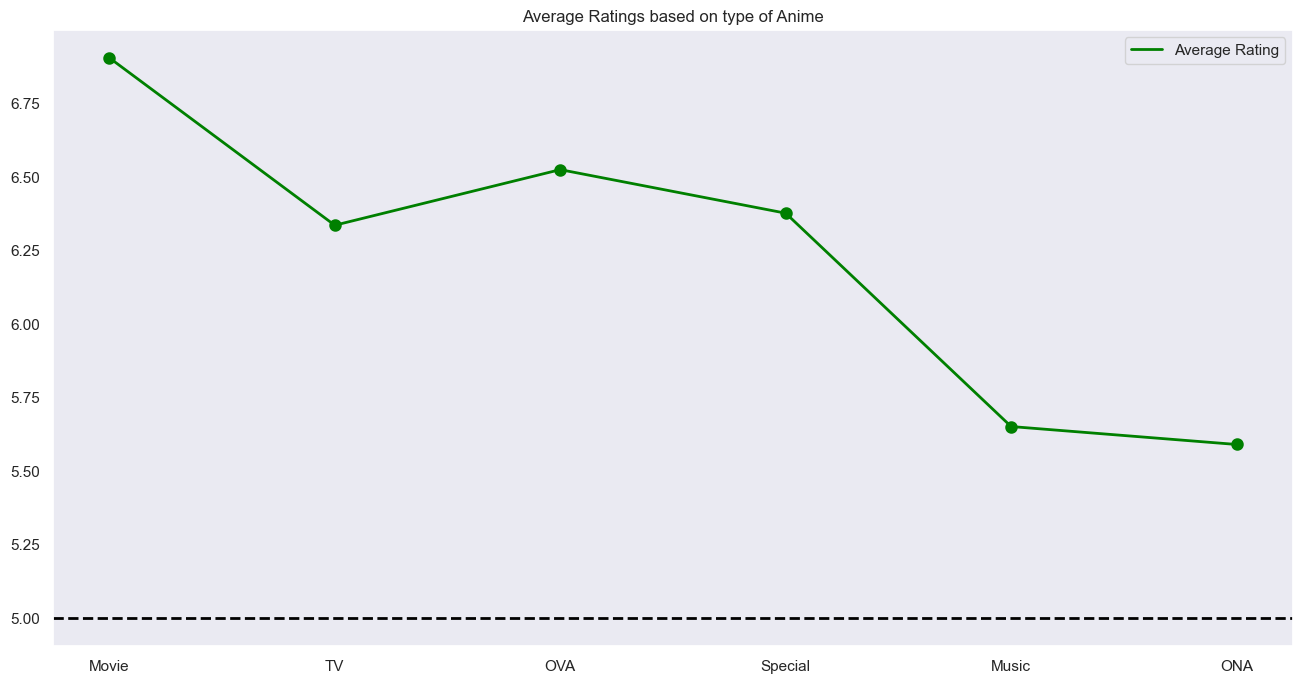

In [29]:
plt.figure(figsize = (16,8))
plt.scatter(an["type"].unique(),avgrat_type, c = "green",linewidth = 3)
plt.plot(an["type"].unique(),avgrat_type,label = "Average Rating", c = "green",linewidth = 2)
plt.axhline(5, color='black', linestyle='--', linewidth=2)
plt.title("Average Ratings based on type of Anime")
plt.grid()
plt.legend()
plt.show()

In [30]:
animedf = pd.read_csv('anime.csv')
ratingdf = pd.read_csv('rating.csv')

In [31]:
def create_user_anime_df(anime,rating):
    rating['rating'] = rating['rating'].replace(-1, pd.NA)
    rating = rating.drop_duplicates(['user_id', 'anime_id'])
    df = anime.merge(rating, how="left", on="anime_id")
    df.rename(columns = {'rating_x':'AverageRating','rating_y':'rating'}, inplace = True)
    comment_counts = pd.DataFrame(df["name"].value_counts())
    rare_movies = comment_counts[comment_counts["count"] <= 1000].index
    common_movies = df[~df["name"].isin(rare_movies)]
    user_anime_df = common_movies.pivot_table(index=["user_id"], columns=["name"], values="rating")
    return user_anime_df

In [32]:
def user_based_recommender(random_user, user_anime_df,ratingdf,ratio=60, cor_th=0.65, score=3.7):

    random_user_df = user_anime_df[user_anime_df.index == random_user]
    anime_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
    anime_watched_df = user_anime_df[anime_watched]
    
    user_anime_count = anime_watched_df.T.notnull().sum()
    user_anime_count = user_anime_count.reset_index()
    user_anime_count.columns = ["userId", "anime_count"]
    
    perc = len(anime_watched) * ratio / 100
    users_same_anime = user_anime_count[user_anime_count["anime_count"] > perc]["userId"]

    final_df = pd.concat([anime_watched_df[anime_watched_df.index.isin(users_same_anime)],
                          random_user_df[anime_watched]])
    
    duplicated = final_df.index.duplicated()
    final_df = final_df[~duplicated]
    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['user_id_1', 'user_id_2']
    corr_df = corr_df.reset_index()

    top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= cor_th)][
        ["user_id_2", "corr"]].reset_index(drop=True)

    top_users = top_users.sort_values(by='corr', ascending=False)
    top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
    top_users_ratings = top_users.merge(ratingdf[["user_id", "anime_id","rating"]], how='inner')
    top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']

    recommendation_df = top_users_ratings.groupby('anime_id').agg({"weighted_rating": "mean"})
    recommendation_df = recommendation_df.reset_index()

    anime_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > score].sort_values("weighted_rating", ascending=False)
    animedf = pd.read_csv('anime.csv')

    return anime_to_be_recommend.merge(animedf[["anime_id", "name"]])

In [33]:
user_anime_df = create_user_anime_df(animedf,ratingdf)
random_user = int(pd.Series(user_anime_df.index).sample(1).values)
user_based=user_based_recommender(random_user, user_anime_df,ratingdf).head(10)

if user_based.empty== True:
    print("Try again! No matches found for this user.")
    print(f"user id: {random_user}")
else:
    print(f"user id: {random_user} \n\n {user_based}")

user id: 45664 

    anime_id weighted_rating                                               name
0     15335        9.001029  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
1     18295        9.001029                      Kakumeiki Valvrave 2nd Season
2     11979        9.001029  Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...
3        93        9.001029                            Mobile Suit Gundam Seed
4        94        9.001029                    Mobile Suit Gundam Seed Destiny
5      1088        9.001029                                            Macross
6      1089        9.001029                     Macross: Do You Remember Love?
7      6768        9.001029  Code Geass: Hangyaku no Lelouch R2 Special Edi...
8      2269        9.001029            Mobile Suit Gundam Seed Special Edition
9     14807        9.001029                      Kara no Kyoukai: Mirai Fukuin


## Tutorial 8 (b) - Collaborative Filtering

http://localhost:8888/notebooks/Documents/CCT/Machine%20Learning/Tutorial_8/Tutorial%208%20(b)%20-%20Collaborative%20Filtering.ipynb

In [34]:
an.tail(1)

,anime_id,name,genre,type,episodes,rating,members
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [35]:
r.tail(1)

,user_id,anime_id,rating
7813736,73516,8074,9


In [36]:
r.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [37]:
isnull = r.isnull().sum()

nperc = pd.DataFrame((isnull / (len(r))) * 100)

nperc.columns = ["% of NaN"]

nperc.head(20)

,% of NaN
user_id,0.0
anime_id,0.0
rating,0.0


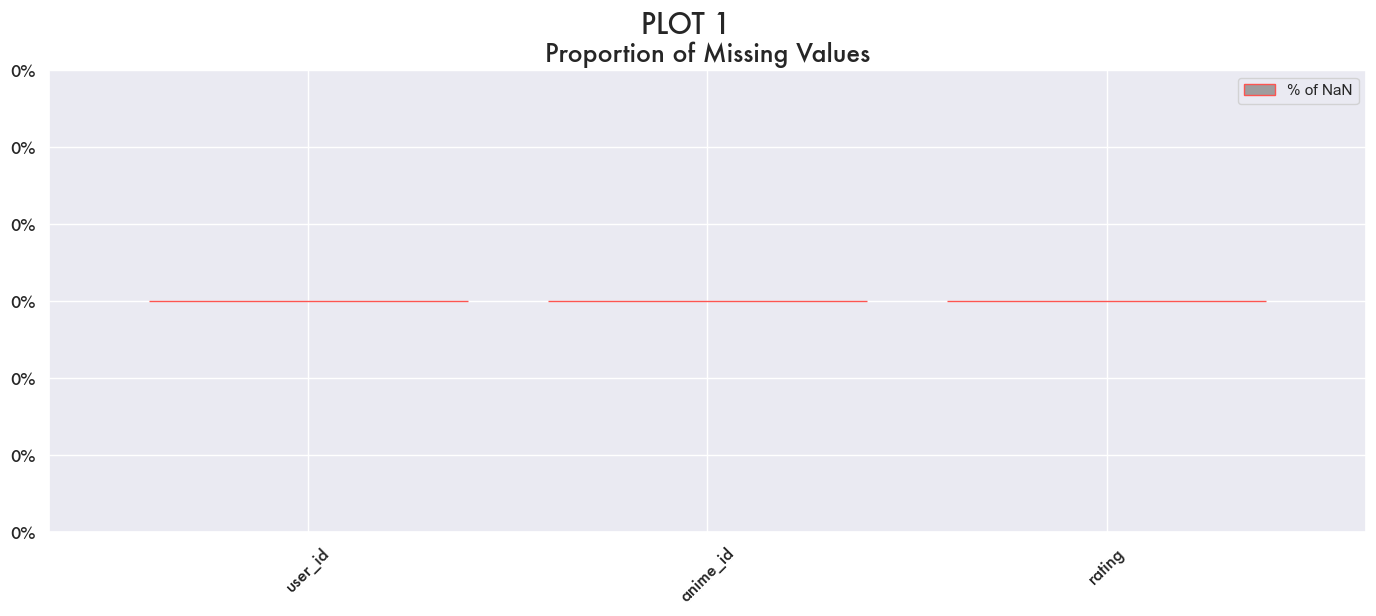

In [38]:
nperc.plot(kind = "bar", color = "#9F9D9E", figsize = (17,6),
          width = 0.8, edgecolor = "#FD5551", 
          linestyle = "-")


plt.suptitle("PLOT 1", font = "Futura", fontsize = 20)
plt.title("Proportion of Missing Values", font = "Futura", fontsize = 18)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]], font = "Futura")
plt.xticks(rotation = 45, font = "Futura");

an["episodes"] = an["episodes"].astype(int)

In [39]:
r.dropna(subset = ["rating"], inplace = True)

In [40]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = r.copy()
y = r['user_id']

# Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7813737, 3), (7813737,), (5860302, 3), (1953435, 3), (5860302,), (1953435,))

In [41]:
# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [42]:
# Define the baseline model to always return 3.
def baseline(user_id, movie_id):
    return 3.0

In [43]:
# Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    
    #Construct a list of user-movie tuples from the testing dataset
    id_pairs = zip(X_test['user_id'], X_test['anime_id'])
    
    #Predict the rating for every user-movie tuple
    y_pred = np.array([cf_model(user, anime) for (user, anime) in id_pairs])
    
    #Extract the actual ratings given by the users in the test data
    y_true = np.array(X_test['rating'])
    
    #Return the final RMSE score
    return rmse(y_true, y_pred)

In [44]:
score(baseline)

4.8777705742749475

In [45]:
# Build the ratings matrix using pivot_table function
r_matrix = X_train.pivot_table(values = 'rating', index = 'user_id', columns = 'anime_id')

r_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
r_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72781 entries, 1 to 73516
Columns: 10809 entries, 1 to 34519
dtypes: float64(10809)
memory usage: 5.9 GB


In [47]:
#User Based Collaborative Filter using Mean Ratings
def cf_user_mean(user_id, anime_id):
    
    #Check if movie_id exists in r_matrix
    if anime_id in r_matrix:
        #Compute the mean of all the ratings given to the movie
        mean_rating = r_matrix[anime_id].mean()
    
    else:
        #Default to a rating of 3.0 in the absence of any information
        mean_rating = 3.0
    
    return mean_rating

In [48]:
#Compute RMSE for the Mean model
score(cf_user_mean)

3.6420421011479136

In [49]:
#Create a dummy ratings matrix with all null values imputed to 0
r_matrix_dummy = r_matrix.copy().fillna(0)

https://www.kaggle.com/code/bromotdi/anime-dataset

https://www.kaggle.com/code/dumanmesut/anime-recomendation-systems

https://archive.ics.uci.edu/dataset/132/movie